<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/10_Time_series_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series forecasting fundamentals with tensorflow + Milestone Project: 3

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-05-23 16:49:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-05-23 16:49:25 (5.25 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [2]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col=['Date'], parse_dates=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.columns = ['currency', 'close', 'opne', 'high', 'low']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   currency  2787 non-null   object 
 1   close     2787 non-null   float64
 2   opne      2787 non-null   float64
 3   high      2787 non-null   float64
 4   low       2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
df.columns

Index(['currency', 'close', 'opne', 'high', 'low'], dtype='object')

In [6]:
df.isnull().sum()

currency    0
close       0
opne        0
high        0
low         0
dtype: int64

In [7]:

# Only want closing price for each day
bf = pd.DataFrame(df["close"]).rename(columns={"close": "price"})
bf.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


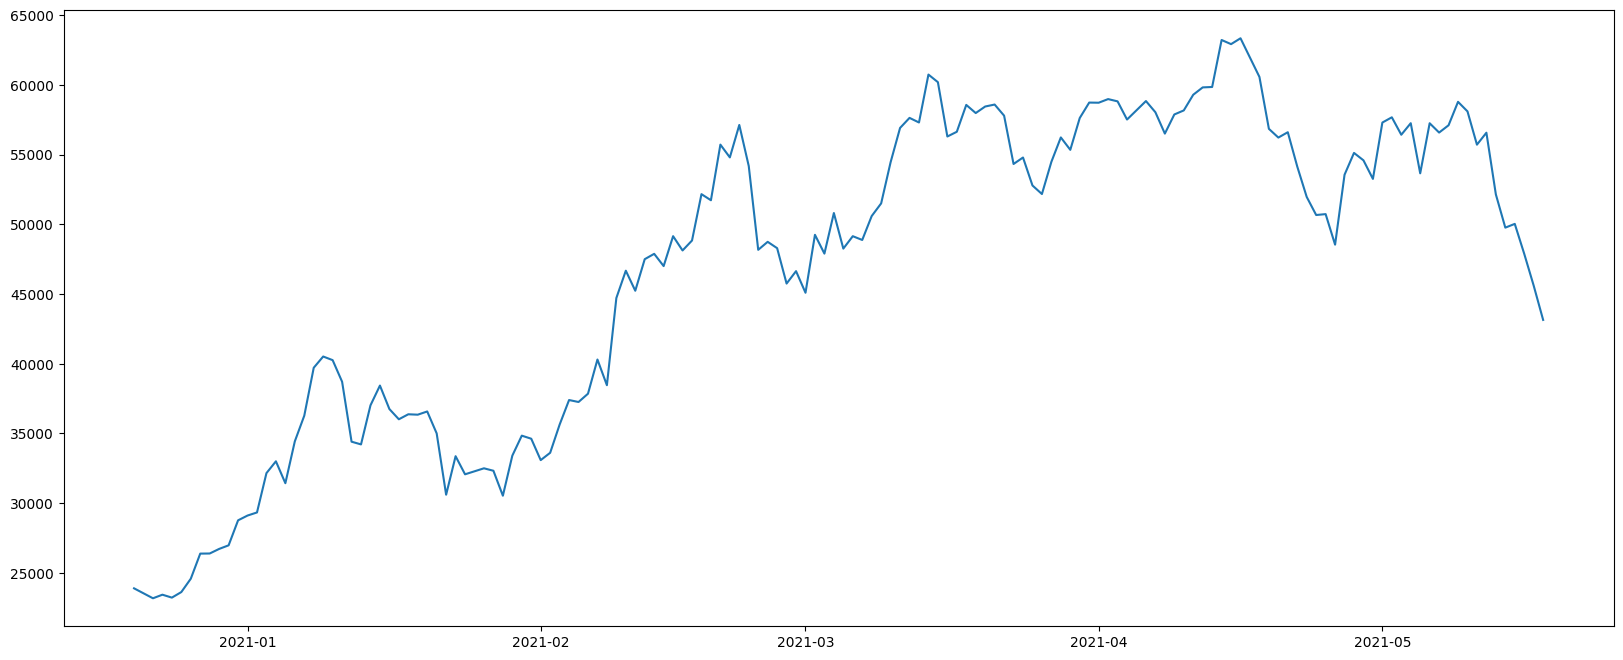

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot(df.index[-150:], df['close'][-150:])

##Split the dataset

In [9]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [10]:
from sklearn.model_selection import train_test_split

X = df.index
y = df.close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
len(X_train), len(X_test)

(2229, 558)

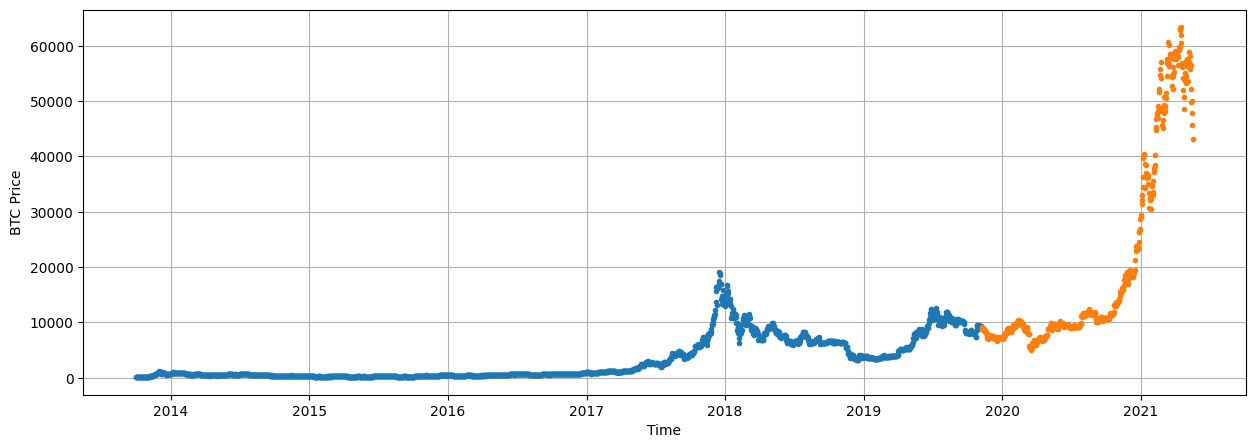

In [11]:
plt.figure(figsize=(15, 5))
plot_time_series(X_train, y_train)
plot_time_series(X_test, y_test)

##Model Experiments

Termes to be fimilier with:
* **Horizen**: number of timesteps into the future we're going to predict.
* **Window size**: number of timesteps we are going to use to predict.

Models:
* 1.Naive Bayes (baseline)
* 2.Dense Model (Horizen=1, window=7)
* 3.Same as Model2 (Horizen=1, window=30)
* 4.Same as Model2 (Horizen=7, window=30)
* 5.Conv1D
* 6.LSTM
* 7.Same as Model 2 but with multivariet data
* 8.N-BEATS algorithm
* 9.Ensemble (multiple models stacked togather)
* 10.Future prediction model
* 11.Same as Model 1

### Model_1 Naive Bayes Model

Formula:
$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - This is the Horizen of 1.

In [12]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(Date
 2019-11-08    9226.485821
 2019-11-09    8794.358645
 2019-11-10    8798.042055
 2019-11-11    9081.186878
 2019-11-12    8711.534339
 2019-11-13    8760.892718
 2019-11-14    8749.520591
 2019-11-15    8656.970922
 2019-11-16    8500.643558
 2019-11-17    8469.260899
 Name: close, dtype: float64,
 Date
 2021-05-08    57107.120672
 2021-05-09    58788.209679
 2021-05-10    58102.191426
 2021-05-11    55715.546651
 2021-05-12    56573.555472
 2021-05-13    52147.821187
 2021-05-14    49764.132082
 2021-05-15    50032.693137
 2021-05-16    47885.625255
 2021-05-17    45604.615754
 Name: close, dtype: float64)

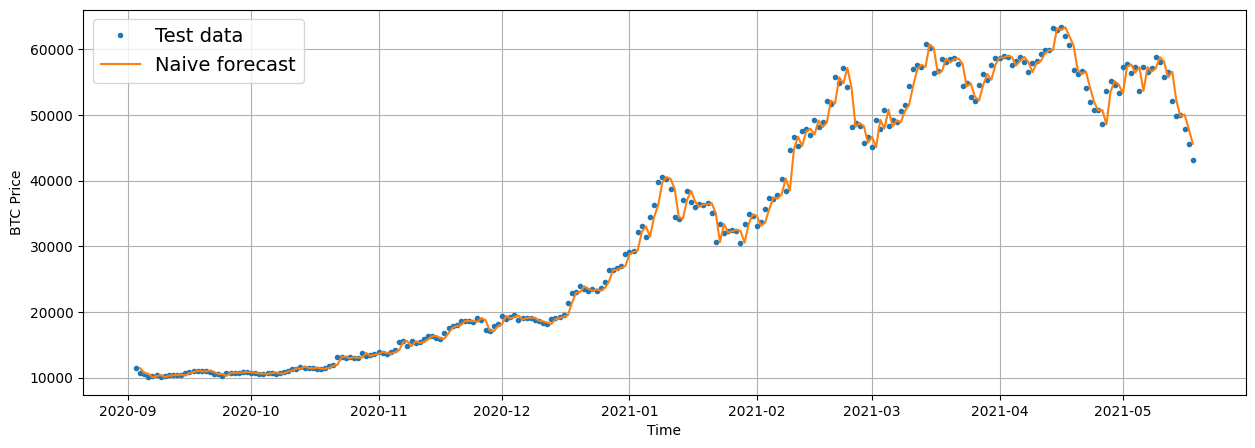

In [13]:
# Plot naive forecast
plt.figure(figsize=(15, 5))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, start=300, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], start=300, values=naive_forecast, format="-", label="Naive forecast")

### Some common Evaluating metrics
* MAE - Mean Absolute error
* MSE - Mean Squared error
* Root MSE - root(MSE)
* Mean Absolute Percentage Error
* Mean Absolute Scaled Error (MASE)

>Resourse: https://otexts.com/fpp3/accuracy.html#percentage-errors


In [14]:
import tensorflow as tf

In [15]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [16]:
mean_absolute_scaled_error(y_test[1:].values, naive_forecast.values).numpy()

0.9995699939182624

In [17]:
## Creating the evaluation matrix function
def calculate_evaluation_metrics(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [18]:
calculate_evaluation_metrics(y_test[1:].values, naive_forecast.values)

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Format Dataset: Windowing our dataset

In [19]:
btc_price = df.close.to_numpy()

In [20]:
btc_price

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [21]:
print(f"We want to use {btc_price[:7]}, to predict this: {btc_price[7]}")

We want to use [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ], to predict this: 123.033


In [22]:
HORIZON = 1
WINDOW = 7

In [23]:
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[: , -horizon:]

In [24]:
data, label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))

In [25]:
tf.squeeze(data[0]).numpy(), tf.squeeze(label[0]).numpy()

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), 7)

In [26]:
data = tf.squeeze(data).numpy()
label = tf.squeeze(label).numpy()

In [27]:
data, label

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), 7)

In [28]:
prices = btc_price

In [29]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [30]:
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [31]:
## View first 3
for i in range(3):
  print(full_windows[i], full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


### Turning the windows and labels into train_data and test_data


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels, test_size=0.2, shuffle=False)
len(X_train), len(X_test)

(2224, 556)

### Building model checkpoint

In [33]:
import os
def model_checkpoint(model_name, path='model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(os.path.join(path, model_name),
                                            save_best_only=True,
                                            save_freq='epoch')

## Model_1: Dense model with window=7, horizon=1

In [39]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 128, activation='relu'),
    tf.keras.layers.Dense(units=HORIZON, activation='linear')
])

model.compile(loss='mae',
              optimizer='Adam',
              metrics=['mae', 'mse'])

history_1 = model.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=128,
                      validation_data=(X_test, y_test),
                      callbacks=[model_checkpoint('model_1')])

Epoch 1/100
18/18 [==============================] - 2s 60ms/step - loss: 2565.2300 - mae: 2565.2300 - mse: 18144550.0000 - val_loss: 4396.7793 - val_mae: 4396.7793 - val_mse: 36622360.0000
Epoch 2/100
18/18 [==============================] - 1s 46ms/step - loss: 394.3557 - mae: 394.3557 - mse: 565240.3750 - val_loss: 1190.3075 - val_mae: 1190.3075 - val_mse: 4275737.0000
Epoch 3/100
18/18 [==============================] - 1s 45ms/step - loss: 233.8505 - mae: 233.8505 - mse: 257902.3906 - val_loss: 1100.4971 - val_mae: 1100.4971 - val_mse: 4047751.2500
Epoch 4/100
18/18 [==============================] - 1s 72ms/step - loss: 196.8823 - mae: 196.8823 - mse: 201296.2656 - val_loss: 1069.0731 - val_mae: 1069.0731 - val_mse: 3817021.2500
Epoch 5/100
18/18 [==============================] - 1s 34ms/step - loss: 189.6852 - mae: 189.6852 - mse: 189628.7812 - val_loss: 1050.2916 - val_mae: 1050.2916 - val_mse: 3573818.7500
Epoch 6/100
18/18 [==============================] - 1s 31ms/step - lo

In [40]:
model_1 = tf.keras.models.load_model('model_experiment/model_1/')
model_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 571.5601 - mae: 571.5601 - mse: 1172056.0000


[571.5601196289062, 571.5601196289062, 1172056.0]